In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns

prj_dir = '/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/'

import sys, os
sys.path.append(prj_dir + 'src/')
import _config, _lib

import sim_injective as parent_script

Using data folder:
 /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/data/


## test

In [94]:
exp_nm = 'test'

orig_in_df = pd.read_csv(parent_script.out_dir + f'{exp_nm}/all_inputs.csv', index_col = 0).T
orig_out_df = pd.read_csv(parent_script.out_dir + f'{exp_nm}/all_marginals.csv', index_col = 0).T

print(in_df.shape, out_df.shape)

(2000, 4) (2000, 4)


In [95]:
import umap.umap_ as umap

In [96]:
umap_in = umap.UMAP(verbose = True).fit_transform(orig_in_df)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
   metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
   n_neighbors=15, negative_sample_rate=5, random_state=None,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Fri Jan 24 19:56:15 2020 Finding Nearest Neighbors
Fri Jan 24 19:56:15 2020 Finished Nearest Neighbor Search
Fri Jan 24 19:56:16 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Fri Jan 24 19:56:23 2020 F

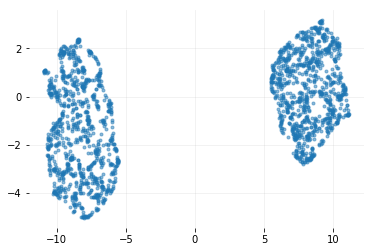

In [97]:
plt.plot(
    umap_in.T[0],
    umap_in.T[1],
    '.',
    alpha = 0.5,
)
plt.grid(alpha = 0.2)
sns.despine(left = True, bottom = True)

In [98]:
umap_out = umap.UMAP(verbose = True).fit_transform(orig_out_df)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
   metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
   n_neighbors=15, negative_sample_rate=5, random_state=None,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Fri Jan 24 19:56:30 2020 Finding Nearest Neighbors
Fri Jan 24 19:56:30 2020 Finished Nearest Neighbor Search
Fri Jan 24 19:56:31 2020 Construct embedding


/home/unix/maxwshen/.local/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 21 separate connected components using meta-embedding (experimental)
  n_components


	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Fri Jan 24 19:56:40 2020 Finished embedding


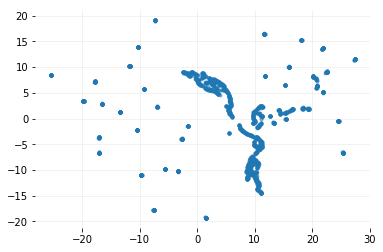

In [99]:
plt.plot(
    umap_out.T[0],
    umap_out.T[1],
    '.',
    alpha = 0.5,
)
plt.grid(alpha = 0.2)
sns.despine(left = True, bottom = True)

## color by distance

In [100]:
rand_idx = np.random.randint(0, len(umap_in))

# umap_in
rand_pt = umap_in[rand_idx]
rand_pt

array([-8.167362 ,  0.4253717], dtype=float32)

In [101]:
dists = []

for idx in range(len(umap_in)):
    pt = umap_in[idx]
    
    dist = np.sqrt(np.sum((rand_pt - pt)**2))
    dists.append(dist)
    
max_dist = max(dists)

num_colors = 100
palette = sns.color_palette('hls', num_colors)
colors = [palette[int(num_colors * (dist / max_dist)) - 1] for dist in dists]

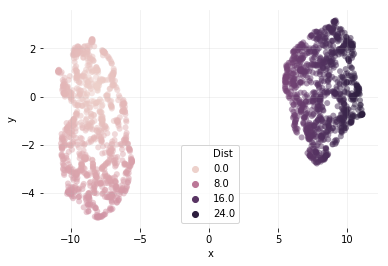

In [102]:
in_df = pd.DataFrame(umap_in, columns = ['x', 'y'])
in_df['Color'] = colors
in_df['Dist'] = dists

sns.scatterplot(
    x = 'x',
    y = 'y',
    data = in_df,
    alpha = 0.5,
    hue = 'Dist',
    linewidth = 0,
)
plt.grid(alpha = 0.2)
sns.despine(left = True, bottom = True)

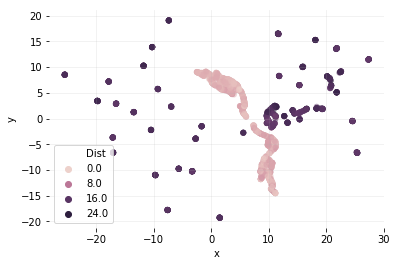

In [103]:
out_df = pd.DataFrame(umap_out, columns = ['x', 'y'])
out_df['Color'] = colors
out_df['Dist'] = dists

sns.scatterplot(
    x = 'x',
    y = 'y',
    data = out_df,
    alpha = 0.5,
    hue = 'Dist',
    linewidth = 0,
)
plt.grid(alpha = 0.2)
sns.despine(left = True, bottom = True)

## find close pairs in output space that are distant in input space

In [104]:
from collections import defaultdict
dd = defaultdict(list)

def dist(x1, x2):
    return np.sqrt(np.mean((x1 - x2)**2))

for idx in range(len(umap_in)):
    for jdx in range(idx + 1, len(umap_in)):
        
        i1, i2 = umap_in[idx], umap_in[jdx]
        o1, o2 = umap_out[idx], umap_out[jdx]
        
        dd['UMAP input dist'].append(np.linalg.norm(i1 - i2))
        dd['UMAP output dist'].append(np.linalg.norm(o1 - o2))
        dd['idx'].append(idx)
        dd['jdx'].append(jdx)

dist_df = pd.DataFrame(dd)

In [105]:
dist_df.head()

,UMAP input dist,UMAP output dist,idx,jdx
0,0.892808,10.250618,0,1
1,2.750441,16.040873,0,2
2,3.834175,2.457094,0,3
3,2.613095,16.387348,0,4
4,4.080303,24.187162,0,5


In [106]:
dist_df['Score'] = dist_df['UMAP input dist'] - dist_df['UMAP output dist']

In [107]:
dist_df.sort_values(by = 'Score', ascending = False).head()

,UMAP input dist,UMAP output dist,idx,jdx,Score
504169,21.731335,0.132592,270,1025,21.598743
504862,21.753889,0.155783,270,1718,21.598106
504305,21.631062,0.103173,270,1161,21.527888
395256,21.531427,0.013138,208,1201,21.518289
504580,21.606720,0.364352,270,1436,21.242368


In [111]:
dist_df.sort_values(by = 'UMAP output dist', ascending = True).head()

,UMAP input dist,UMAP output dist,idx,jdx,Score
1744797,3.923231,0.000076,1286,1625,3.923155
1843696,1.075554,0.000096,1442,1542,1.075459
1754962,1.405918,0.000097,1300,1913,1.405822
1987754,2.424757,0.000134,1849,1929,2.424624
1759174,4.733360,0.000167,1306,1952,4.733194


## investigate a single instance

0     1.00
1     1.20
2     1.00
3     3.40
4     0.90
5     0.05
6     0.05
7     0.00
8    -1.00
9    -1.00
10   -1.00
11    1.00
Name: exp 208, dtype: float64

0      1.00
1      3.00
2      1.00
3      1.40
4      0.90
5      0.00
6      0.00
7      0.05
8     -1.00
9      4.00
10    12.00
11    -1.00
Name: exp 1201, dtype: float64

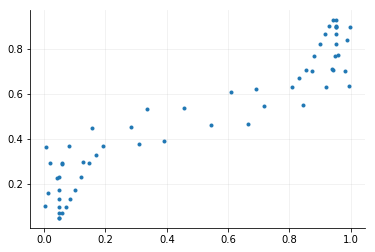

In [112]:
index_i, index_j = 208, 1201

display(orig_in_df.iloc[index_i])

display(orig_in_df.iloc[index_j])

plt.plot(
    orig_out_df.iloc[index_i],
    orig_out_df.iloc[index_j],
    '.',
)
sns.despine()
plt.grid(alpha = 0.2)

0      1.00
1      3.20
2      9.60
3      7.40
4      0.90
5      0.00
6      0.00
7      0.05
8     -1.00
9     10.00
10    14.00
11    -1.00
Name: exp 1286, dtype: float64

0     1.00
1     7.00
2     7.40
3     7.40
4     0.90
5     0.00
6     0.00
7     0.05
8    -1.00
9     1.00
10    4.00
11   -1.00
Name: exp 1625, dtype: float64

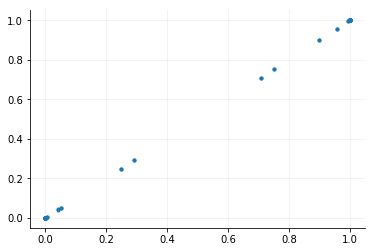

In [113]:
index_i, index_j = 1286, 1625

display(orig_in_df.iloc[index_i])

display(orig_in_df.iloc[index_j])

plt.plot(
    orig_out_df.iloc[index_i],
    orig_out_df.iloc[index_j],
    '.',
)
sns.despine()
plt.grid(alpha = 0.2)

0      1.00
1      9.60
2      8.40
3      9.20
4      0.90
5      0.00
6      0.00
7      0.05
8     -1.00
9     10.00
10     3.00
11    -1.00
Name: exp 1442, dtype: float64

0      1.00
1      6.40
2      8.40
3      9.20
4      0.90
5      0.00
6      0.00
7      0.05
8     -1.00
9     13.00
10     8.00
11    -1.00
Name: exp 1542, dtype: float64

count    6.000000e+01
mean    -4.442281e-17
std      5.015183e-05
min     -1.088847e-04
25%     -3.592646e-06
50%      0.000000e+00
75%      3.592646e-06
max      1.088847e-04
dtype: float64

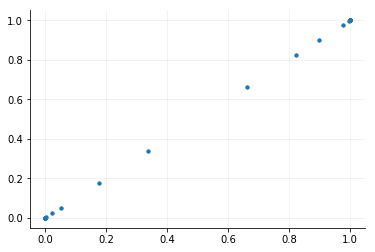

In [118]:
index_i, index_j = 1442, 1542

display(orig_in_df.iloc[index_i])
display(orig_in_df.iloc[index_j])

plt.plot(
    orig_out_df.iloc[index_i],
    orig_out_df.iloc[index_j],
    '.',
)
sns.despine()
plt.grid(alpha = 0.2)

(orig_out_df.iloc[index_i] - orig_out_df.iloc[index_j]).describe()